In [13]:
import os, shutil

In [14]:
### 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 데이터 셋 복사 및 확인
!cp -r '/content/drive/My Drive/dataset/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 1665576
831624 -rw------- 1 root root 851576689 Jul  1 08:14 dogs-vs-cats.zip
    88 -rw------- 1 root root     88903 Jul  1 08:14 sampleSubmission.csv
277660 -rw------- 1 root root 284321224 Jul  1 08:14 test1.zip
556204 -rw------- 1 root root 569546721 Jul  1 08:14 train.zip


In [16]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 8
drwxr-xr-x 2 root root 4096 Jul  1 08:11 .
drwxr-xr-x 5 root root 4096 Jul  1 08:12 ..
0
total 8
drwxr-xr-x 2 root root 4096 Jul  1 08:12 .
drwxr-xr-x 5 root root 4096 Jul  1 08:12 ..
0


## **구글드라이브 연동시켜서 파일 불러오기 다시 확인하기**

In [18]:
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/cats_and_dogs_test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/cats_and_dogs_train.zip' -d '/content/datasets/'

unzip:  cannot find or open /content/cats_dogs/cats_and_dogs_test1.zip, /content/cats_dogs/cats_and_dogs_test1.zip.zip or /content/cats_dogs/cats_and_dogs_test1.zip.ZIP.
unzip:  cannot find or open /content/cats_dogs/cats_and_dogs_train.zip, /content/cats_dogs/cats_and_dogs_train.zip.zip or /content/cats_dogs/cats_and_dogs_train.zip.ZIP.


In [19]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

ls: cannot access '/content/datasets/train': No such file or directory
ls: cannot access '/content/datasets/train': No such file or directory
0
ls: cannot access '/content/datasets/test1': No such file or directory
ls: cannot access '/content/datasets/test1': No such file or directory
0


## **CNN (2) - 이미지제너레이터**

In [43]:
import os, shutil

In [44]:
### 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 데이터 셋 복사 및 확인
!cp -r '/content/drive/My Drive/dataset/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 1665580
831624 -rw------- 1 root root 851576689 Jul  1 08:28 dogs-vs-cats.zip
    88 -rw------- 1 root root     88903 Jul  1 08:28 sampleSubmission.csv
277664 -rw------- 1 root root 284321224 Jul  1 08:28 test1.zip
556204 -rw------- 1 root root 569546721 Jul  1 08:28 train.zip


In [46]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609260
drwxr-xr-x 2 root root 770048 Sep 20  2013 .
drwxr-xr-x 5 root root   4096 Jul  1 08:18 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304268
drwxr-xr-x 2 root root 278528 Sep 20  2013 .
drwxr-xr-x 5 root root   4096 Jul  1 08:18 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [47]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [48]:
# 여러번 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [49]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [51]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [52]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [53]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [55]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

AttributeError: ignored

## **AttributeError: module 'keras.optimizers' has no attribute 'RMSprop'**

## **강아지 vs 고양이 분류하기(3)-VGG16**

In [20]:
import os, shutil

In [21]:
### 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!cp -r '/content/drive/My Drive/dataset/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 1665576
831624 -rw------- 1 root root 851576689 Jul  1 08:17 dogs-vs-cats.zip
    88 -rw------- 1 root root     88903 Jul  1 08:17 sampleSubmission.csv
277660 -rw------- 1 root root 284321224 Jul  1 08:17 test1.zip
556204 -rw------- 1 root root 569546721 Jul  1 08:17 train.zip


In [23]:
# 압축풀기
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/train.zip' -d '/content/datasets/'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/t

In [24]:
!ls -ltr  '/content/datasets/' | head -10
!ls -ltr  '/content/datasets/train' | tail -10
!ls -ltr  '/content/datasets/test1' | tail -10

total 1024
drwxr-xr-x 2 root root 770048 Sep 20  2013 train
drwxr-xr-x 2 root root 278528 Sep 20  2013 test1
-rw-r--r-- 1 root root 25671 Sep 20  2013 cat.9937.jpg
-rw-r--r-- 1 root root  3744 Sep 20  2013 cat.9936.jpg
-rw-r--r-- 1 root root 27700 Sep 20  2013 cat.9935.jpg
-rw-r--r-- 1 root root 32621 Sep 20  2013 cat.9999.jpg
-rw-r--r-- 1 root root  9937 Sep 20  2013 cat.9998.jpg
-rw-r--r-- 1 root root 18575 Sep 20  2013 cat.9997.jpg
-rw-r--r-- 1 root root 16855 Sep 20  2013 cat.9996.jpg
-rw-r--r-- 1 root root 13785 Sep 20  2013 cat.9995.jpg
-rw-r--r-- 1 root root 30029 Sep 20  2013 cat.9994.jpg
-rw-r--r-- 1 root root 29133 Sep 20  2013 cat.9993.jpg
-rw-r--r-- 1 root root  5286 Sep 20  2013 12440.jpg
-rw-r--r-- 1 root root 16612 Sep 20  2013 12439.jpg
-rw-r--r-- 1 root root 42306 Sep 20  2013 12438.jpg
-rw-r--r-- 1 root root 20759 Sep 20  2013 12437.jpg
-rw-r--r-- 1 root root 16850 Sep 20  2013 12436.jpg
-rw-r--r-- 1 root root 26283 Sep 20  2013 12435.jpg
-rw-r--r-- 1 root root 29062 

In [25]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609260
drwxr-xr-x 2 root root 770048 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Jul  1 08:17 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304268
drwxr-xr-x 2 root root 278528 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Jul  1 08:17 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [26]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [27]:
# 반복실행을 위해 디렉터리 삭제 ( cats_and_dogs_small )
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [28]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [29]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [30]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [32]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,  # 완전 분류 연결기 포함/미포함
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 2s 0us/step


In [33]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

# 데이터 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [35]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    print("피처, 레이블 : ", features.shape, labels.shape  )

    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        #print(  type(features_batch), features_batch.shape  )
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 
            # 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    #print(  type(features), features_batch.shape  )
    return features, labels

In [36]:
t_features, t_labels = extract_features(train_dir, 100)
print( t_features.shape, t_labels.shape )

피처, 레이블 :  (100, 4, 4, 512) (100,)
Found 2000 images belonging to 2 classes.
(100, 4, 4, 512) (100,)


In [37]:
%%time

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

피처, 레이블 :  (2000, 4, 4, 512) (2000,)
Found 2000 images belonging to 2 classes.
피처, 레이블 :  (1000, 4, 4, 512) (1000,)
Found 1000 images belonging to 2 classes.
피처, 레이블 :  (1000, 4, 4, 512) (1000,)
Found 1000 images belonging to 2 classes.
CPU times: user 32.3 s, sys: 862 ms, total: 33.2 s
Wall time: 38.3 s


In [38]:
print( train_features.shape, train_labels.shape )
print( validation_features.shape, validation_labels.shape )
print( test_features.shape, test_labels.shape )

(2000, 4, 4, 512) (2000,)
(1000, 4, 4, 512) (1000,)
(1000, 4, 4, 512) (1000,)


In [39]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [41]:
%%time

# 완전 연결층
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 6ms/step - loss: 0.6164 - acc: 0.6635 - val_loss: 0.4458 - val_acc: 0.8320
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4269 - acc: 0.8015 - val_loss: 0.3605 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3621 - acc: 0.8490 - val_loss: 0.3270 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3116 - acc: 0.8785 - val_loss: 0.2971 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2812 - acc: 0.8765 - val_loss: 0.2832 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2518 - acc: 0.9060 - val_loss: 0.2681 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2503 - acc: 0.8995 - val_loss: 0.2630 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2357 - acc:

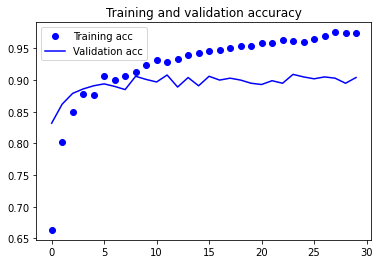

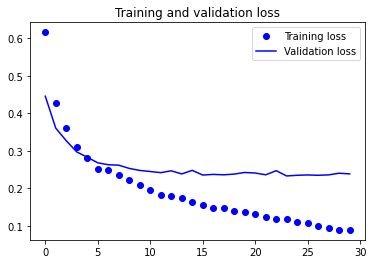

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **CNN (4) - VGG16**

In [56]:
import os, shutil

In [57]:
### 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609260
drwxr-xr-x 2 root root 770048 Sep 20  2013 .
drwxr-xr-x 5 root root   4096 Jul  1 08:29 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304268
drwxr-xr-x 2 root root 278528 Sep 20  2013 .
drwxr-xr-x 5 root root   4096 Jul  1 08:29 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [59]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

# 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [60]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [61]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [62]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [63]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [65]:
print('conv_base를 동결 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결 후 훈련되는 가중치의 수:',   len(model.trainable_weights))

conv_base를 동결 전 훈련되는 가중치의 수: 30
conv_base를 동결 후 훈련되는 가중치의 수: 4


In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

batch_size = 20
epochs = 30

In [67]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
%%time

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,  # total_train // batch_size
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,  # total_val // batch_size
            verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/30
100/100 - 31s - loss: 0.5332 - acc: 0.7460 - val_loss: 0.4163 - val_acc: 0.8360 - 31s/epoch - 307ms/step
Epoch 2/30
100/100 - 26s - loss: 0.4061 - acc: 0.8350 - val_loss: 0.3452 - val_acc: 0.8640 - 26s/epoch - 256ms/step
Epoch 3/30
100/100 - 22s - loss: 0.3640 - acc: 0.8495 - val_loss: 0.3087 - val_acc: 0.8810 - 22s/epoch - 219ms/step
Epoch 4/30
100/100 - 20s - loss: 0.3331 - acc: 0.8655 - val_loss: 0.2879 - val_acc: 0.8930 - 20s/epoch - 203ms/step
Epoch 5/30
100/100 - 20s - loss: 0.3003 - acc: 0.8795 - val_loss: 0.3149 - val_acc: 0.8570 - 20s/epoch - 204ms/step
Epoch 6/30
100/100 - 21s - loss: 0.2901 - acc: 0.8875 - val_loss: 0.2647 - val_acc: 0.9000 - 21s/epoch - 206ms/step
Epoch 7/30
100/100 - 20s - loss: 0.2693 - acc: 0.8945 - val_loss: 0.2655 - val_acc: 0.8980 - 20s/epoch - 201ms/step
Epoch 8/30
100/100 - 22s - loss: 0.2610 - acc: 0.8950 - val_loss: 0.2519 - val_acc: 0.9050 - 22s/epoch - 217ms/step
Epoch 9/30
100/100 - 22s - loss: 0.2620 - acc: 0.8910 - val_loss: 0.2498

In [69]:
model.save('cats_dogs_small_3_dataAug_VGG_30_epoch.h5')

In [70]:
import matplotlib.pyplot as plt

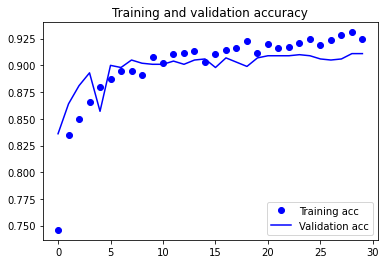

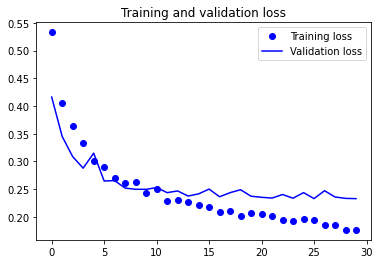

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [73]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [74]:
%%time

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # total_train // batch_size
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # total_val // batch_size
      verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/50
100/100 [==============================] - 24s 216ms/step - loss: 0.1929 - acc: 0.9250 - val_loss: 0.2273 - val_acc: 0.9080
Epoch 2/50
100/100 [==============================] - 22s 215ms/step - loss: 0.1708 - acc: 0.9345 - val_loss: 0.2131 - val_acc: 0.9260
Epoch 3/50
100/100 [==============================] - 22s 215ms/step - loss: 0.1372 - acc: 0.9375 - val_loss: 0.2247 - val_acc: 0.9230
Epoch 4/50
100/100 [==============================] - 21s 215ms/step - loss: 0.1129 - acc: 0.9590 - val_loss: 0.2122 - val_acc: 0.9280
Epoch 5/50
100/100 [==============================] - 23s 230ms/step - loss: 0.1039 - acc: 0.9640 - val_loss: 0.2080 - val_acc: 0.9280
Epoch 6/50
100/100 [==============================] - 21s 215ms/step - loss: 0.0893 - acc: 0.9655 - val_loss: 0.2118 - val_acc: 0.9220
Epoch 7/50
100/100 [==============================] - 21s 214ms/step - loss: 0.0847 - acc: 0.9690 - val_loss: 0.2121 - val_acc: 0.9320
Epoch 8/50
100/100 [==============================] - 2

In [75]:
## 모델 저장
model.save('cats_and_dogs_small_4_misetunning_50.h5')

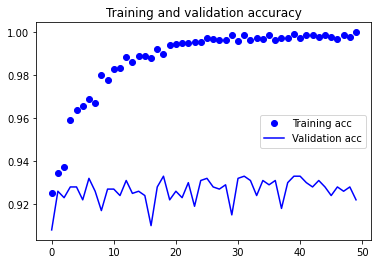

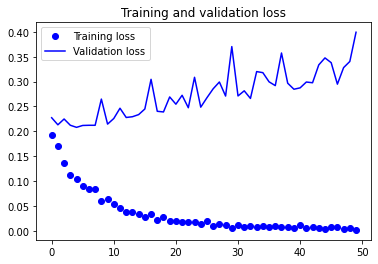

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [77]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9279999732971191
